In [1]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
client_id = 'xxxxxxxxxx'
client_secret = 'xxxxxxxxxx'

client_credentials_manager = spotipy.oauth2.SpotifyClientCredentials(client_id, client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Get Shiina Natsukawa information

In [4]:
# search artist and song id
search = spotify.search("夏川椎菜", limit=50, offset=0, type='track', market=None)
song = pd.DataFrame.from_dict(search["tracks"]["items"])
song_name = pd.DataFrame(song["name"])
song = pd.DataFrame(song["id"])

# get song information
song_info = pd.DataFrame()
for url in song["id"]:
    df = pd.DataFrame.from_dict(spotify.audio_features(url))
    song_info = song_info.append(df)

# drop unnecessary information 
song_info = song_info.reset_index(drop=True)
song_info = song_info.drop(columns=["analysis_url","id","track_href","type","uri"])

# name concat
song_info_all = pd.concat([song_name, song_info], axis=1)
song_info_all.head(30)

,name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,gravity - Album Mix,0.000748,0.603,242720,0.974,0.370000,1,0.1310,-3.372,1,0.0803,127.021,4,0.619
1,Labli-Lubla,0.000543,0.607,246613,0.976,0.809000,11,0.2290,-3.259,0,0.0787,134.061,4,0.698
2,Cheer Me Cheer You,0.000430,0.506,224453,0.980,0.063400,9,0.0856,-2.558,1,0.0981,164.941,4,0.699
3,Daisy Days - Album Mix,0.001840,0.344,285080,0.963,0.443000,8,0.0696,-2.397,1,0.0801,205.253,4,0.571
4,Parade,0.015500,0.591,249267,0.904,0.449000,10,0.3190,-3.193,1,0.0501,115.986,4,0.584
5,Yellow Flag,0.012700,0.631,236960,0.989,0.022200,11,0.3730,-2.707,0,0.0617,120.024,4,0.820
6,Sutetekureba,0.001940,0.453,241187,0.977,0.166000,2,0.8700,-2.549,1,0.2090,149.932,4,0.536
7,Kimitoglide,0.000136,0.521,265480,0.872,0.198000,5,0.4560,-3.316,1,0.0468,123.030,4,0.512
8,Naimonobakari,0.048900,0.614,233360,0.940,0.751000,5,0.0294,-1.958,1,0.0642,159.930,4,0.947
9,Shimaebaii,0.000968,0.598,213040,0.823,0.638000,11,0.1830,-3.380,0,0.0351,128.002,4,0.879


# Analysis

In [5]:
song_info.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.008191,0.539000,247333.307692,0.945692,0.300848,6.923077,0.256508,-2.931231,0.692308,0.079623,144.013769,3.923077,0.667308
std,0.013970,0.087562,24429.900806,0.050204,0.296497,3.751923,0.225835,0.507695,0.480384,0.042683,25.338905,0.277350,0.138697
min,0.000136,0.344000,213040.000000,0.823000,0.000000,1.000000,0.029400,-3.711000,0.000000,0.035100,115.986000,3.000000,0.512000
25%,0.000605,0.506000,233360.000000,0.940000,0.022200,5.000000,0.109000,-3.316000,0.000000,0.061700,127.021000,4.000000,0.571000
50%,0.001840,0.578000,242720.000000,0.969000,0.198000,8.000000,0.183000,-3.157000,1.000000,0.070400,134.917000,4.000000,0.635000
75%,0.012700,0.603000,265480.000000,0.977000,0.449000,10.000000,0.336000,-2.549000,1.000000,0.080300,159.930000,4.000000,0.699000
max,0.048900,0.631000,288173.000000,0.989000,0.809000,11.000000,0.870000,-1.958000,1.000000,0.209000,205.253000,4.000000,0.947000


## Scatter plot

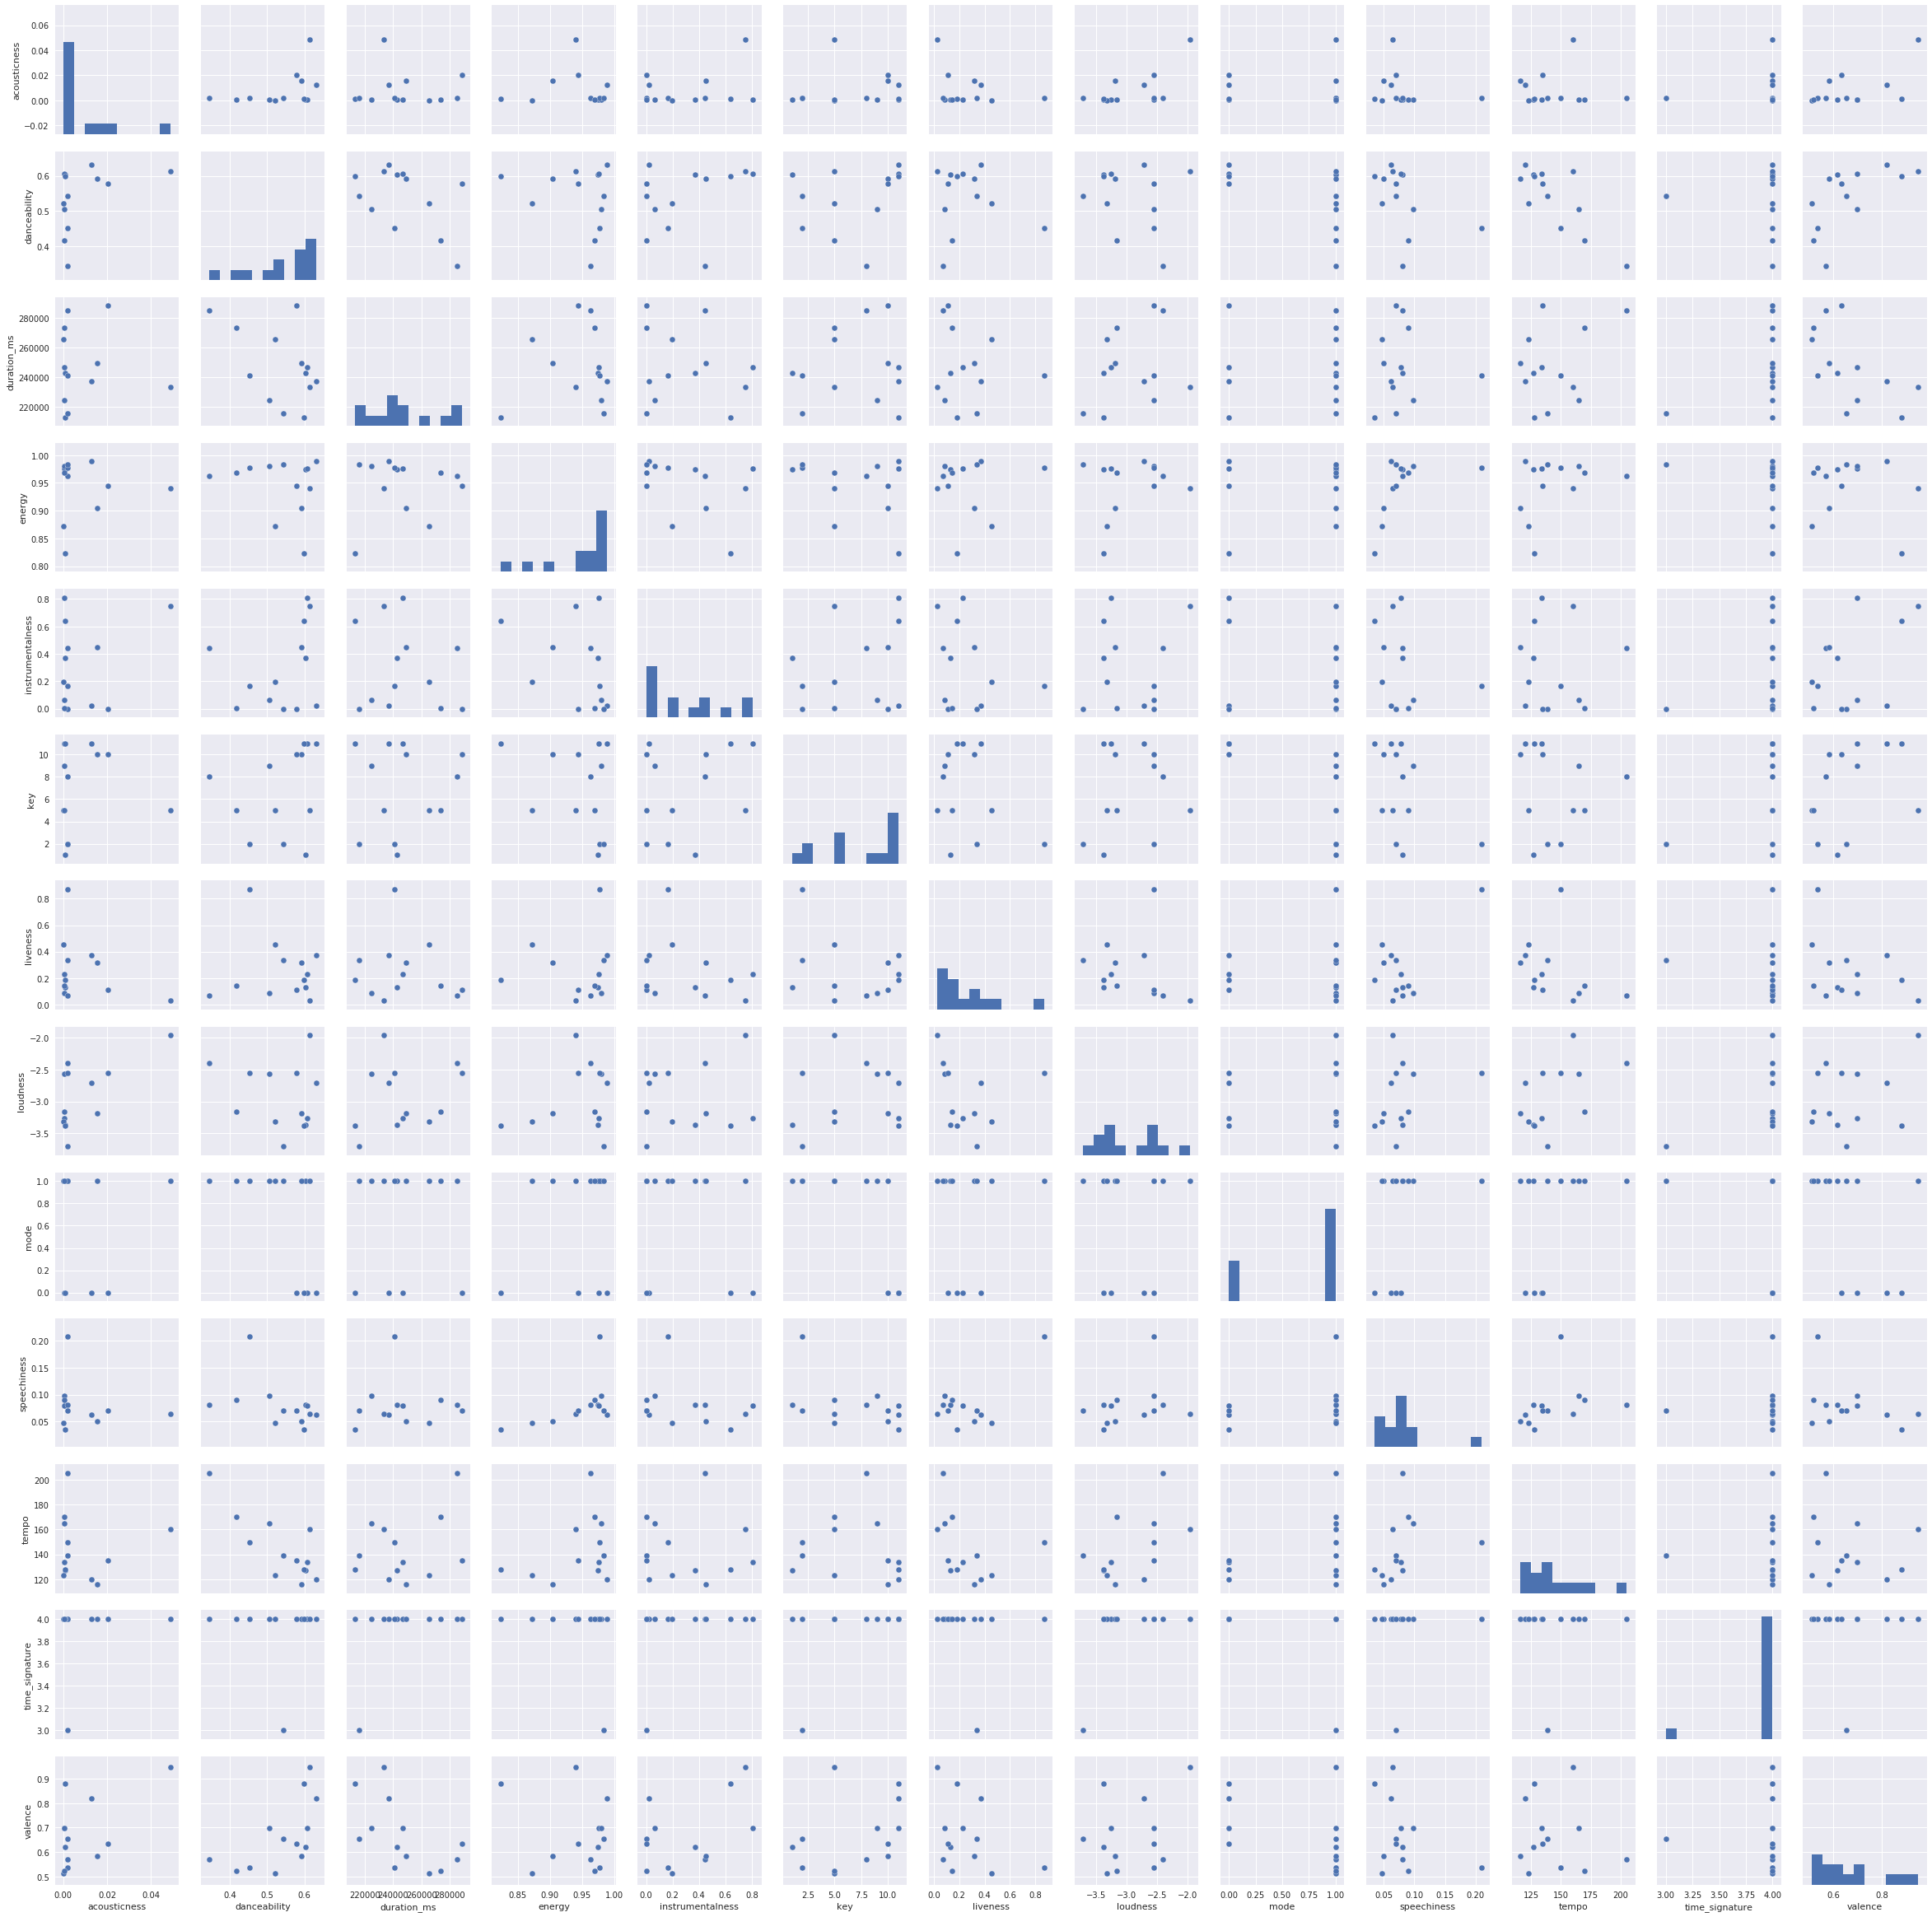

In [6]:
sns.pairplot(song_info)

## Correlation

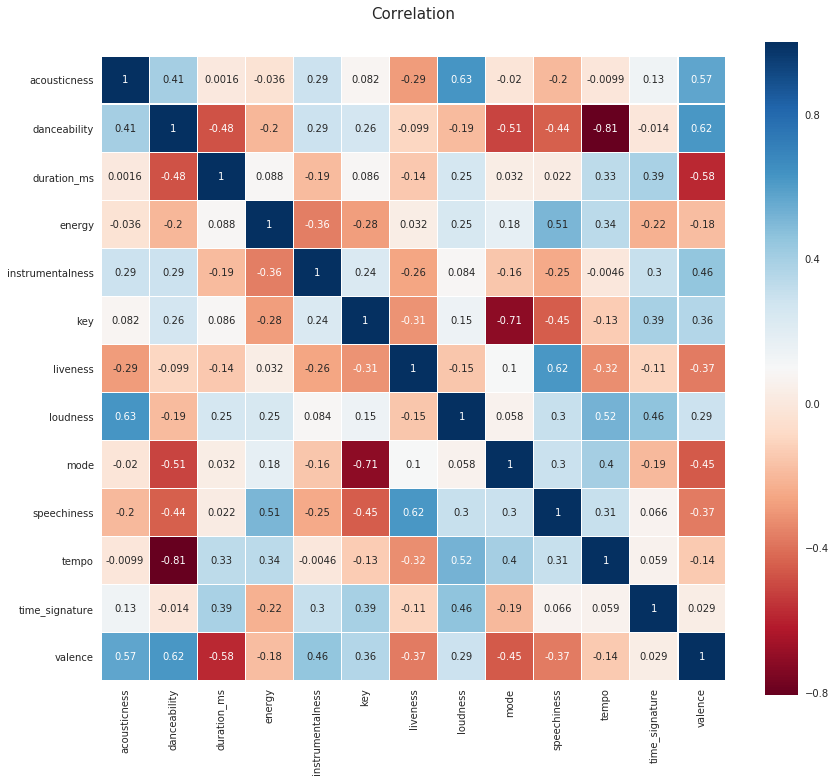

In [7]:
corr_mat = song_info.corr(method='pearson')
plt.figure(figsize=(14,12))
plt.title('Correlation', y=1.05, size=15)
colormap = plt.cm.RdBu
sns.heatmap(corr_mat,
            linewidths=0.1,
            cmap=colormap,
            vmax=1.0, 
            square=True, 
            annot=True)

## Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dfc7ad198>,
      dtype=object)

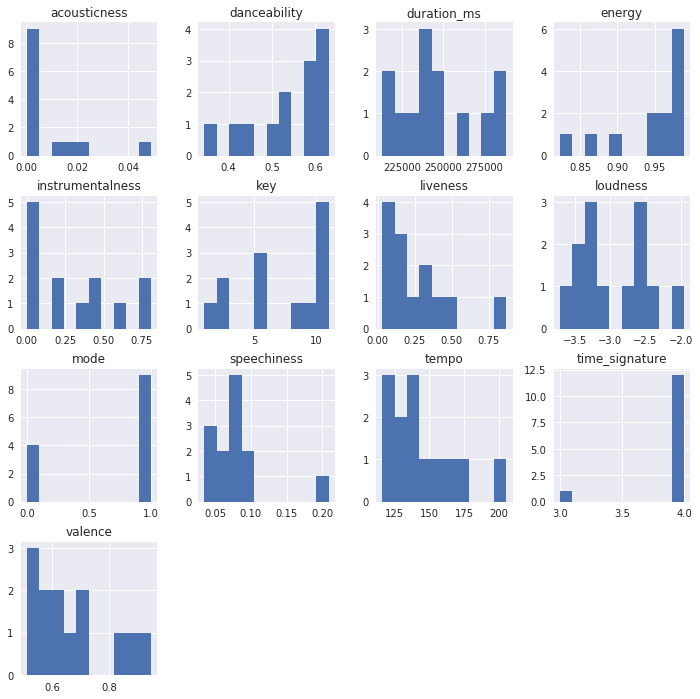

In [8]:
song_info.hist(figsize=(12, 12), bins=10)

## Graph of each data

In [9]:
valence = pd.DataFrame(song_info_all["name"])
valence["valence"] = song_info_all["valence"]
valence.head(20)

,name,valence
0,gravity - Album Mix,0.619
1,Labli-Lubla,0.698
2,Cheer Me Cheer You,0.699
3,Daisy Days - Album Mix,0.571
4,Parade,0.584
5,Yellow Flag,0.820
6,Sutetekureba,0.536
7,Kimitoglide,0.512
8,Naimonobakari,0.947
9,Shimaebaii,0.879


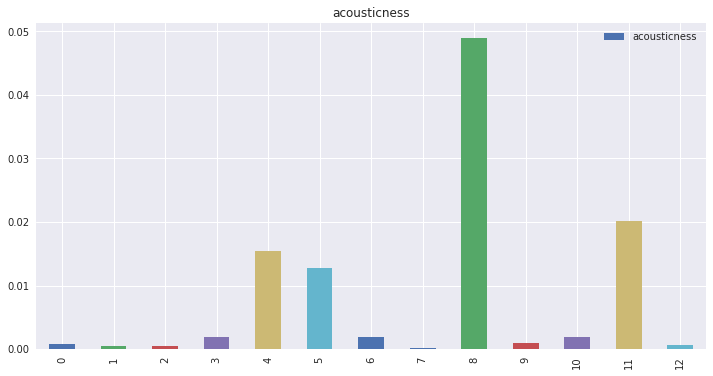

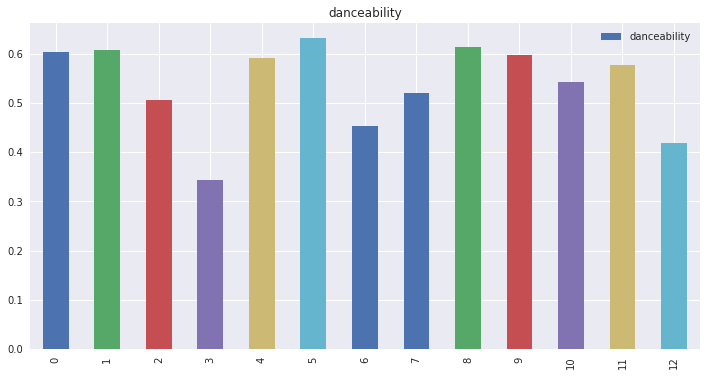

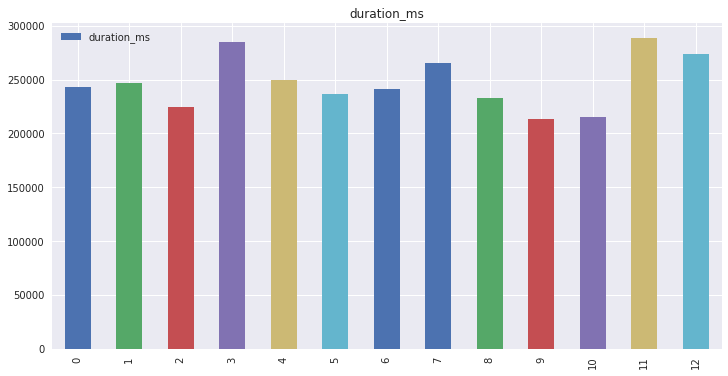

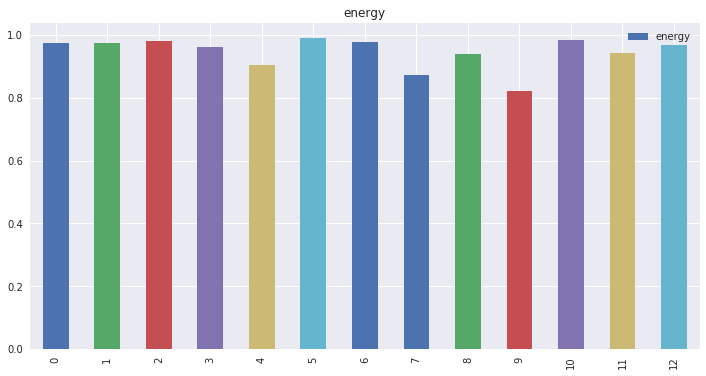

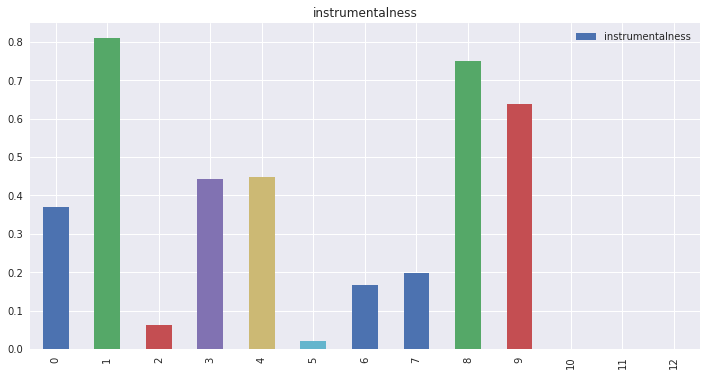

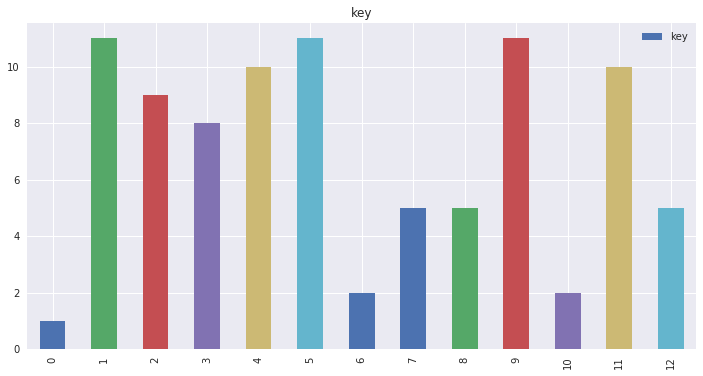

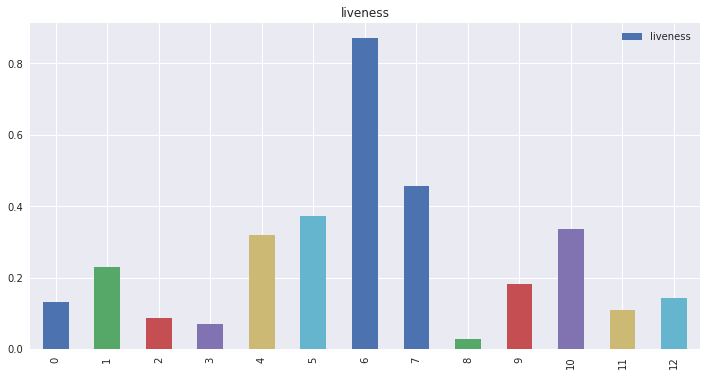

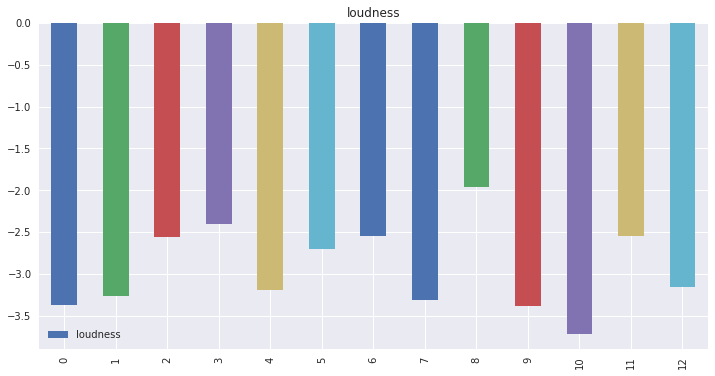

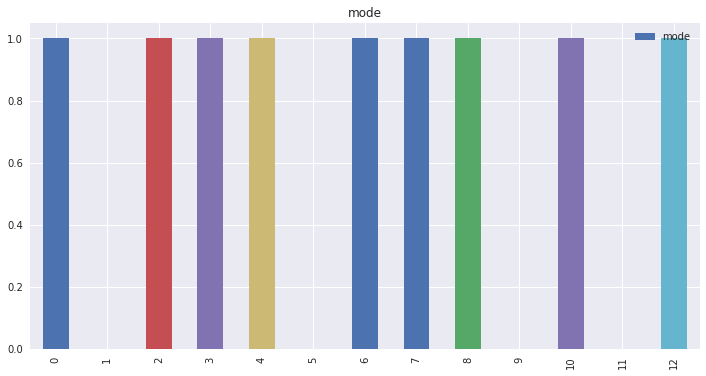

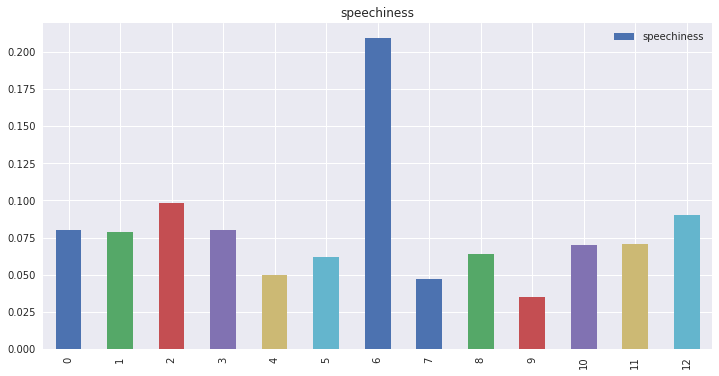

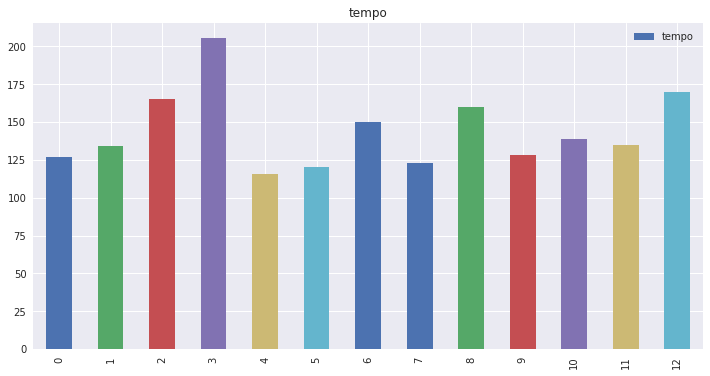

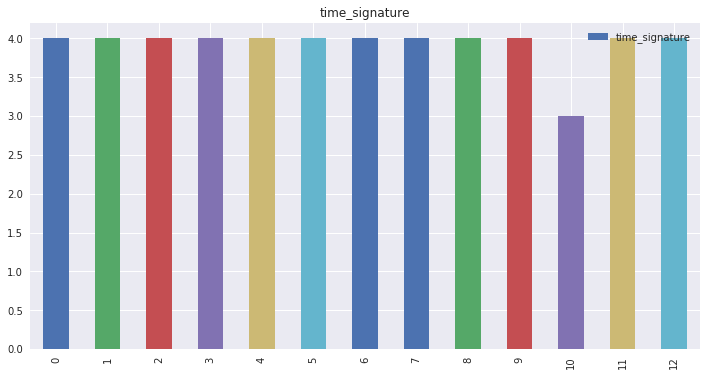

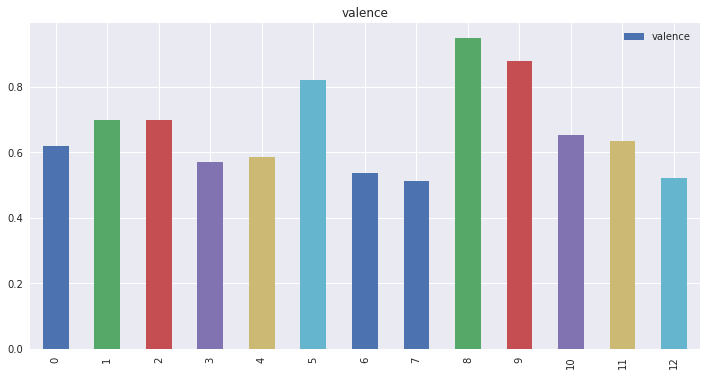

In [10]:
colum_name = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", "loudness", "mode", "speechiness", "tempo", "time_signature", "valence"]

for name in colum_name:
    song_info.plot.bar(y=name, figsize=(12,6))
    plt.title(name)